In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns
import re
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neural_network import MLPClassifier
import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import math
from scipy.stats import multivariate_normal
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**PreProcessing**

 ***Tracks***

In [2]:
tracks = pd.read_csv('tracks.csv',low_memory=False)
tracks.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


In [3]:
new_header = tracks.iloc[0]
tracks = tracks[1:]
tracks.columns = new_header
tracks = tracks.rename(columns={tracks.columns[0]: 'Track_id'})
tracks.index = tracks['Track_id']
tracks = tracks.drop(columns=['Track_id'])
tracks.drop(index='track_id',inplace=True)
tracks.head()

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
Track_id,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


***Genres***

In [14]:
genres = pd.read_csv('genres.csv',low_memory=False)
genres.head()

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [15]:
genres.index = genres['genre_id']
genres.drop(columns=['genre_id', 'parent', 'top_level'],inplace=True)
genres = genres.sort_values('#tracks', ascending = False)[:10]
genres.head()

,#tracks,title
genre_id,,
38,38154,Experimental
15,34413,Electronic
12,32923,Rock
1235,14938,Instrumental
10,13845,Pop


***Echonest***

In [7]:
echonest = pd.read_csv('echonest.csv',low_memory=False)
echonest.head()

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,echonest.4,echonest.5,echonest.6,echonest.7,echonest.8,...,echonest.239,echonest.240,echonest.241,echonest.242,echonest.243,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
0,NaN,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,metadata,...,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features
1,NaN,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,214,215,216,217,218,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051


In [8]:
echonest.columns=echonest.iloc[0]+'-'+echonest.iloc[1]
echonest = echonest.iloc[2:]
echonest.head()

,NaN,audio_features-acousticness,audio_features-danceability,audio_features-energy,audio_features-instrumentalness,audio_features-liveness,audio_features-speechiness,audio_features-tempo,audio_features-valence,metadata-album_date,...,temporal_features-214,temporal_features-215,temporal_features-216,temporal_features-217,temporal_features-218,temporal_features-219,temporal_features-220,temporal_features-221,temporal_features-222,temporal_features-223
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,...,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
6,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,...,-3.6629877090,21.5082283020,0.2833518982,0.2670699954,0.1257044971,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938


In [9]:
echonest = echonest.rename(columns={echonest.columns[0]: 'Track_id'})
echonest.index = echonest['Track_id']
echonest = echonest.drop(columns=['Track_id'])
echonest.drop(index='track_id',inplace=True)
echonest.head()

,audio_features-acousticness,audio_features-danceability,audio_features-energy,audio_features-instrumentalness,audio_features-liveness,audio_features-speechiness,audio_features-tempo,audio_features-valence,metadata-album_date,metadata-album_name,...,temporal_features-214,temporal_features-215,temporal_features-216,temporal_features-217,temporal_features-218,temporal_features-219,temporal_features-220,temporal_features-221,temporal_features-222,temporal_features-223
Track_id,,,,,,,,,,,,,,,,,,,,,
2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,NaN,...,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,Constant Hitmaker,...,-3.6629877090,21.5082283020,0.2833518982,0.2670699954,0.1257044971,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,NaN,NaN,...,-1.4526963234,2.3563981056,0.2346863896,0.1995500028,0.1493317783,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781


In [10]:
tracks.shape,genres.shape,echonest.shape

((106574, 52), (10, 2), (13129, 249))

***Generating dataset***

In [12]:
data = pd.DataFrame(columns=echonest.columns)
track_genre_map = {}
for track_id,features in echonest.iterrows():
    try:
        track_genre = tracks['genres'].loc[track_id]
        track_genre = [int(ans) for ans in re.findall(r'\d+',track_genre)]
        for track_gen in track_genre:
            if track_gen in list(genres.index.values):
                data.loc[track_id] = features
                track_genre_map[track_id] = int(track_gen)
                break
    except:
        pass      
data.head()

,audio_features-acousticness,audio_features-danceability,audio_features-energy,audio_features-instrumentalness,audio_features-liveness,audio_features-speechiness,audio_features-tempo,audio_features-valence,metadata-album_date,metadata-album_name,...,temporal_features-214,temporal_features-215,temporal_features-216,temporal_features-217,temporal_features-218,temporal_features-219,temporal_features-220,temporal_features-221,temporal_features-222,temporal_features-223
2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,...,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,NaN,...,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,NaN,...,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,Constant Hitmaker,...,-3.6629877090,21.5082283020,0.2833518982,0.2670699954,0.1257044971,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,NaN,NaN,...,-1.4526963234,2.3563981056,0.2346863896,0.1995500028,0.1493317783,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781


In [13]:
#saving data into pickle file
data.drop(columns=["metadata-album_date","metadata-album_name"],inplace=True)
data.to_pickle('genre_data.pkl')

In [14]:
#loading data from pickle file
data = pd.read_pickle('genre_data.pkl')
for n in range(len(data.columns)):#converting strings to numerics
    data[data.columns[n]] = data[data.columns[n]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
data.head()

,audio_features-acousticness,audio_features-danceability,audio_features-energy,audio_features-instrumentalness,audio_features-liveness,audio_features-speechiness,audio_features-tempo,audio_features-valence,metadata-artist_latitude,metadata-artist_location,...,temporal_features-214,temporal_features-215,temporal_features-216,temporal_features-217,temporal_features-218,temporal_features-219,temporal_features-220,temporal_features-221,temporal_features-222,temporal_features-223
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,32.6783,0.0,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,32.6783,0.0,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,32.6783,0.0,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,39.9523,0.0,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,32.6783,0.0,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


In [15]:
#Adding label column to data
data['label'] = track_genre_map
data_x = data.drop(columns='label')
data_y = data['label']
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.2,random_state=42)

***Feature Selection***

In [16]:
#Feature Selection
k = 3
knn1 = KNeighborsClassifier(n_neighbors=k)
#SequentialForwardSelection
sfs = SFS(knn1,k_features=3,forward=True,floating=False,verbose=2,scoring='accuracy',cv=0)
sfs1 = sfs.fit(train_x,train_y)
#SequentialFloatingForwardSelection
sffs1 = SFS(knn1,k_features=3,forward=True,floating=True,verbose=2,scoring='accuracy',cv=0)
sffs1 = sffs1.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 247 out of 247 | elapsed:   59.3s finished

[2022-05-04 21:12:39] Features: 1/3 -- score: 0.3414666141938869[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 246 out of 246 | elapsed:   49.8s finished

[2022-05-04 21:13:29] Features: 2/3 -- score: 0.34369670733307095[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   54.3s finished

[2022-05-04 21:14:23] Features: 3/3 -- score: 0.3448773448773449[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [17]:
print('Features selected using SFS for k = {} are \n{}'.format(k,sfs1.subsets_))
print('Features selected using SFFS for k = {} are \n{}'.format(k,sffs1.subsets_))

Features selected using SFS for k = 3 are 
{1: {'feature_idx': (182,), 'cv_scores': array([0.34146661]), 'avg_score': 0.3414666141938869, 'feature_names': ('temporal_features-159',)}, 2: {'feature_idx': (52, 182), 'cv_scores': array([0.34369671]), 'avg_score': 0.34369670733307095, 'feature_names': ('temporal_features-029', 'temporal_features-159')}, 3: {'feature_idx': (52, 182, 224), 'cv_scores': array([0.34487734]), 'avg_score': 0.3448773448773449, 'feature_names': ('temporal_features-029', 'temporal_features-159', 'temporal_features-201')}}
Features selected using SFFS for k = 3 are 
{1: {'feature_idx': (182,), 'cv_scores': array([0.34146661]), 'avg_score': 0.3414666141938869, 'feature_names': ('temporal_features-159',)}, 2: {'feature_idx': (52, 182), 'cv_scores': array([0.34369671]), 'avg_score': 0.34369670733307095, 'feature_names': ('temporal_features-029', 'temporal_features-159')}, 3: {'feature_idx': (52, 182, 224), 'cv_scores': array([0.34487734]), 'avg_score': 0.34487734487734

***Variance Threshold***

Text(0, 0.5, 'Num of features')

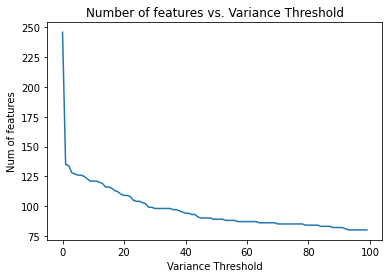

In [18]:
threshold = []
num_features = []
threshold_range = range(0,100)
for var in threshold_range:
    vt = VarianceThreshold(threshold=var)
    data_vt = data
    _ = vt.fit(data_vt)
    mask = vt.get_support()
    data_final = data_vt.loc[:,mask]
    num_features.append(data_final.shape[1])
    threshold.append(var)
plt.plot(threshold, num_features)
plt.title('Number of features vs. Variance Threshold')
plt.xlabel('Variance Threshold')
plt.ylabel('Num of features')

**Feature Transformation-**
***PCA***

Text(0.5, 0.92, 'PCA')

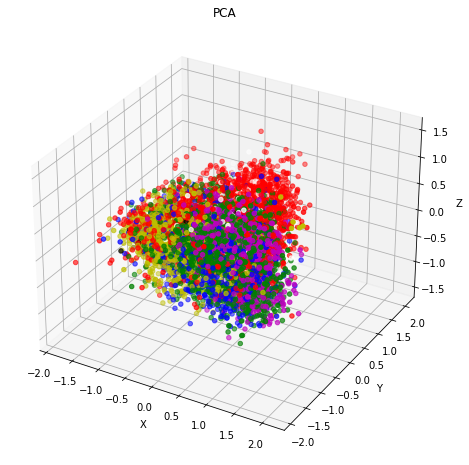

In [19]:
min_max_scaler = MinMaxScaler()
data_pca = min_max_scaler.fit_transform(data)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_pca)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
color_map = {10:'b', 12:'g', 15:'r', 17:'y', 21:'w', 25:'m', 1235:'k'}

X,Y,Z=[],[],[]
colors=[]
for index, row in enumerate(data_pca):
    X.append(row[0])
    Y.append(row[1])
    Z.append(row[2])
    genre = track_genre_map[data.index.values[index]]
    colors.append(color_map[genre])

ax.scatter(X,Y,Z, c=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('PCA')

**Feature Transformation-**
***LDA***

Text(0.5, 0.92, 'LDA')

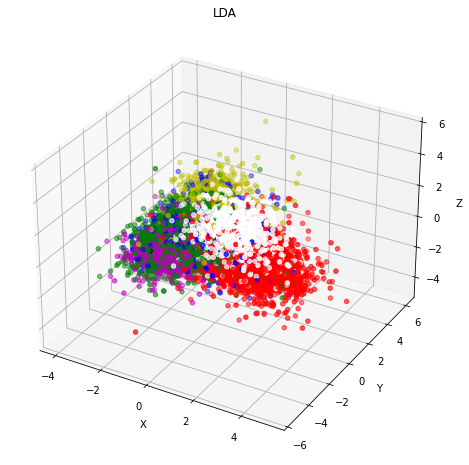

In [20]:
track_genres_labels = []
for track in list(data.index.values):
    track_genres_labels.append(track_genre_map[track])
data_lda = min_max_scaler.fit_transform(data)
lda = LDA(n_components=3)
data_lda = lda.fit_transform(data_lda,track_genres_labels)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

X,Y,Z=[],[],[]
colors=[]
for index, row in enumerate(data_lda):
    X.append(row[0])
    Y.append(row[1])
    Z.append(row[2])
    genre = track_genre_map[data.index.values[index]]
    colors.append(color_map[genre])
ax.scatter(X,Y,Z, c=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('LDA')

In [21]:
#LDA-reduced data
lda_red_df = pd.DataFrame(data_lda,columns=['lda-1','lda-2','lda-3'])
lda_red_df['label'] = track_genres_labels
lda_red_df.head()

,lda-1,lda-2,lda-3,label
0,0.749502,-0.225255,1.446180,21
1,0.836979,-0.676740,1.969890,21
2,0.569155,-1.005245,1.810573,21
3,-0.627754,-0.340754,-0.900570,10
4,0.898591,-1.647014,1.996347,21


In [22]:
#PCA reduced data
pca_red_df = pd.DataFrame(data_pca,columns=['pca-1','pca-2','pca-3'])
pca_red_df['label'] = track_genres_labels
pca_red_df.head()

,pca-1,pca-2,pca-3,label
0,0.241720,0.147762,-0.232157,21
1,0.463119,0.216356,-0.128520,21
2,0.533276,0.601304,-0.166714,21
3,0.396215,-0.458226,0.282335,10
4,0.168344,0.634777,0.094799,21


**Classifier-**
***K-NN***

In [23]:
def KNN_Classifier(data,k_val=100):
    k_range = range(3,k_val)
    err = []
    conf_matrix = []
    min_error = 100.0
    data_x = data.drop(columns='label')
    data_y = data['label']
    train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.2,random_state=42)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        error_rate = []
        knn.fit(train_x, train_y)
        pred_y = knn.predict(test_x)
        conf_mat = confusion_matrix(test_y, pred_y)
        error = (1-accuracy_score(test_y, pred_y))*100
        error_rate.append(error) 
        if error < min_error:
            min_error = error
            conf_matrix = [conf_mat, k]
        error = np.mean(error_rate)
        err.append(error)
    return k_range,err, conf_matrix

**K-NN Classifier - PCA**

Classification performed using PCA data
Minimum classification error occured when k = 85
Confusion Matrix when k = 85:
[[ 75  88  82  37   6   2   0]
 [ 37 256 111  41   4  20   0]
 [ 23  77 417  44  12   7   0]
 [ 35  37  34 104   1   0   0]
 [  9  21 144   2  16   0   0]
 [  3 104  22   2   0  24   0]
 [  1   1   1   5   1   0   0]]
Average Error rate: 54.783050810787415%
Variance of Error rate: 1.9369537013427987


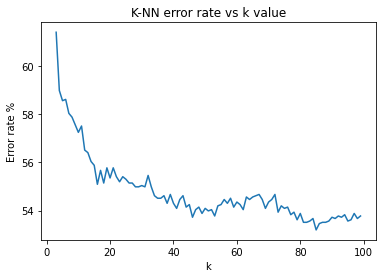

In [24]:
k_range,error_rate,conf_matrix=KNN_Classifier(pca_red_df,100)
plt.plot(k_range, error_rate)
plt.title("K-NN error rate vs k value")
plt.xlabel('k')
plt.ylabel('Error rate %')
print("Classification performed using PCA data")
print('Minimum classification error occured when k = {}'.format(conf_matrix[1]))
print('Confusion Matrix when k = {}:\n{}'.format(conf_matrix[1],conf_matrix[0]))
print('Average Error rate: {}%'.format(np.mean(error_rate)))
print('Variance of Error rate: {}'.format(np.var(error_rate)))

**K-NN Classifier LDA**

Classification performed using LDA data
Minimum classification error occured when k = 58
Confusion Matrix when k = 58:
[[ 27 120  84  43  13   3   0]
 [ 24 335  49  23  13  25   0]
 [ 14  26 505  11  23   1   0]
 [ 12  27  21 146   5   0   0]
 [  5   5  38   0 144   0   0]
 [  2 124   5   0   2  22   0]
 [  1   0   1   6   1   0   0]]
Average Error rate: 39.28018952629244%
Variance of Error rate: 2.334919798011917


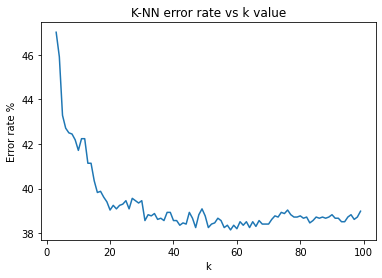

In [25]:
k_range,error_rate,conf_matrix=KNN_Classifier(lda_red_df,100)
plt.plot(k_range, error_rate)
plt.title("K-NN error rate vs k value")
plt.xlabel('k')
plt.ylabel('Error rate %')
print("Classification performed using LDA data")
print('Minimum classification error occured when k = {}'.format(conf_matrix[1]))
print('Confusion Matrix when k = {}:\n{}'.format(conf_matrix[1],conf_matrix[0]))
print('Average Error rate: {}%'.format(np.mean(error_rate)))
print('Variance of Error rate: {}'.format(np.var(error_rate)))

***Classifier-MLP***

In [26]:
def MLP_Classifier(data):
    err = []
    min_error=100
    conf_matrix = []
    folds = KFold(n_splits=10, shuffle=True)
    #folds = folds.split(data.drop(['label'],axis=1))
    for trainIndex, testIndex in folds.split(data.drop(['label'],axis=1)):
        train_x = data.loc[trainIndex,:]
        test_x = data.loc[testIndex,:]
        train_y = train_x['label']
        test_y = test_x['label']
        train_x.drop(columns='label',inplace=True)
        test_x.drop(columns='label',inplace=True)
        mlp = MLPClassifier(max_iter = 500, early_stopping=True, validation_fraction=0.15)
        mlp.fit(train_x, train_y)
        pred_y = mlp.predict(test_x)
        conf_mat = confusion_matrix(test_y, pred_y)
        error = (1-accuracy_score(test_y, pred_y))*100
        if error<min_error:
            min_error = error
            conf_matrix = conf_mat
        err.append(error)
    return err, conf_mat

**MLP Classifier - PCA**

In [27]:
error_rate,conf_mat = MLP_Classifier(pca_red_df)
print('MLP Classifier using PCA data')
print('Confusion Matrix: \n{}'.format(conf_mat))
print('Average error rate: {}%'.format(np.mean(error_rate)))
print('Variance: {}'.format(np.var(error_rate)))

MLP Classifier using PCA data
Confusion Matrix: 
[[ 34  39  37  22   2   1   0]
 [ 22 102  53  24   0  10   0]
 [  6  41 225  25   2   4   0]
 [ 16  13  18  60   2   0   0]
 [  4  12  81   0   0   0   0]
 [  2  55  17   2   0  16   0]
 [  1   2   1   1   0   0   0]]
Average error rate: 54.15048233354203%
Variance: 1.652903073406156


**MLP-Classifier LDA**

In [28]:
error_rate,conf_mat = MLP_Classifier(lda_red_df)
print('MLP Classifier using LDA data')
print('Confusion Matrix: \n{}'.format(conf_mat))
print('Average error rate: {}%'.format(np.mean(error_rate)))
print('Variance: {}'.format(np.var(error_rate)))

MLP Classifier using LDA data
Confusion Matrix: 
[[ 15  57  48  23   7   1   0]
 [ 15 135  22  15   4   9   0]
 [  7  26 245  10  19   1   0]
 [  7  13  10  77   4   0   0]
 [  0   0  28   3  59   0   0]
 [  1  72   2   1   0  12   0]
 [  0   0   3   1   0   0   0]]
Average error rate: 39.406396871445324%
Variance: 3.9015807829532276


***Logistic Regression***

In [29]:
def LR_Classifier(data):
    err = []
    min_error=100
    conf_matrix = []
    folds = KFold(n_splits=10, shuffle=True)
    #folds = folds.split(data.drop(['label'],axis=1))
    for trainIndex, testIndex in folds.split(data.drop(['label'],axis=1)):
        train_x = data.loc[trainIndex,:]
        test_x = data.loc[testIndex,:]
        train_y = train_x['label']
        test_y = test_x['label']
        train_x.drop(columns='label',inplace=True)
        test_x.drop(columns='label',inplace=True)
        LR = LogisticRegression()
        LR.fit(train_x, train_y)
        pred_y = LR.predict(test_x)
        conf_mat = confusion_matrix(test_y, pred_y)
        error = (1-accuracy_score(test_y, pred_y))*100
        if error<min_error:
            min_error = error
            conf_matrix = conf_mat
        err.append(error)
    return err, conf_mat

**LR - PCA**

In [30]:
error_rate,conf_mat = LR_Classifier(pca_red_df)
print('Logistic Regression using PCA data')
print('Confusion Matrix: \n{}'.format(conf_mat))
print('Average error rate: {}%'.format(np.mean(error_rate)))
print('Variance: {}'.format(np.var(error_rate)))

Logistic Regression using PCA data
Confusion Matrix: 
[[ 28  51  42  26   0   1   0]
 [ 16 134  69  16   0  12   0]
 [ 10  36 209  12   0   5   0]
 [  8  24  15  47   0   1   0]
 [  6   8  95   0   1   1   0]
 [  1  41  18   0   0  11   0]
 [  0   4   2   2   0   0   0]]
Average error rate: 54.86409569074219%
Variance: 0.730000779283485


**LR-LDA**

In [31]:
error_rate,conf_mat = LR_Classifier(lda_red_df)
print('Logistic Regression using LDA data')
print('Confusion Matrix: \n{}'.format(conf_mat))
print('Average error rate: {}%'.format(np.mean(error_rate)))
print('Variance: {}'.format(np.var(error_rate)))

Logistic Regression using LDA data
Confusion Matrix: 
[[ 11  60  42  13   6   0   0]
 [ 11 174  21  14   4   7   0]
 [  6  13 262  16  10   1   0]
 [ 12  12  10  74   2   0   0]
 [  1   4  19   0  64   1   0]
 [  1  63   1   0   0  13   0]
 [  0   0   4   0   0   0   0]]
Average error rate: 39.64713377481108%
Variance: 1.3807663702259716


***Classifier - SVM***

In [32]:
def SVM_Classifier(data):
    err = []
    min_error=100
    conf_matrix = []
    folds = KFold(n_splits=10, shuffle=True)
    #folds = folds.split(data.drop(['label'],axis=1))
    for trainIndex, testIndex in folds.split(data.drop(['label'],axis=1)):
        train_x = data.loc[trainIndex,:]
        test_x = data.loc[testIndex,:]
        train_y = train_x['label']
        test_y = test_x['label']
        train_x.drop(columns='label',inplace=True)
        test_x.drop(columns='label',inplace=True)
        clf = SVC()
        clf.fit(train_x, train_y)
        pred_y = clf.predict(test_x)
        conf_mat = confusion_matrix(test_y, pred_y)
        error = (1-accuracy_score(test_y, pred_y))*100
        if error<min_error:
            min_error = error
            conf_matrix = conf_mat
        err.append(error)
    return err, conf_mat

**SVM-PCA**

In [33]:
error_rate,conf_mat = SVM_Classifier(pca_red_df)
print('SVM Classifier using PCA data')
print('Confusion Matrix: \n{}'.format(conf_mat))
print('Average error rate: {}%'.format(np.mean(error_rate)))
print('Variance: {}'.format(np.var(error_rate)))

SVM Classifier using PCA data
Confusion Matrix: 
[[ 30  43  42  21   0   0   0]
 [ 18 123  71  16   0   0   0]
 [ 12  41 246  19   2   0   0]
 [ 16  24  17  52   0   0   0]
 [  4  11  69   0   4   0   0]
 [  2  52  10   1   0   4   0]
 [  0   1   0   1   0   0   0]]
Average error rate: 53.9298830760006%
Variance: 2.868827472362577


**SVM-LDA**

In [34]:
error_rate,conf_mat = SVM_Classifier(lda_red_df)
print('SVM Classifier using LDA data')
print('Confusion Matrix: \n{}'.format(conf_mat))
print('Average error rate: {}%'.format(np.mean(error_rate)))
print('Variance: {}'.format(np.var(error_rate)))

SVM Classifier using LDA data
Confusion Matrix: 
[[  7  71  44  22   4   0   0]
 [  4 173  20   9   3   0   0]
 [  4  26 267   9  18   0   0]
 [  8  17  12  63   1   0   0]
 [  0   8  25   1  54   0   0]
 [  0  70   4   2   1   0   0]
 [  0   0   3   2   0   0   0]]
Average error rate: 39.542576736885735%
Variance: 1.2627918338425101


***Bayesian Classifier - PCA***

In [104]:
train_data_pca = pca_red_df[:math.ceil(len(pca_red_df)*0.8)]
test_data_pca = pca_red_df[math.ceil(len(pca_red_df)*0.8):]
labels = set(pca_red_df['label'])
mu,sigma=[],[]
for i in labels:
    label_data = train_data_pca[train_data_pca['label']==i]
    label_data_x = label_data.drop('label',axis=1)
    label_data_y = label_data['label']
    mu.append(label_data_x.mean())
    sigma.append(label_data_x.cov())

In [105]:
genre_titles = genres['title'][list(labels)]
mat = pd.DataFrame(0, index=genre_titles, columns=genre_titles)
mat = mat.rename_axis('Actual')
mat = mat.rename_axis('Predicted',axis='columns')

In [106]:
labels=list(labels)
for test_index in range(len(test_data_pca)):
    test_x = test_data_pca.iloc[test_index]
    test_y = test_x['label']
    test_x.drop('label',inplace=True)
    class_cond = []
    for class_index,mu_i in enumerate(mu):
        sigma_i = sigma[class_index]
        mvn = multivariate_normal(mean=mu_i,cov=sigma_i,allow_singular=True)
        class_cond.append(mvn.pdf(test_x))
    predicted_class_index = np.argmax(class_cond)
    predicted_class = labels[predicted_class_index]
    predicted_class_title = genres.loc[predicted_class].title
    actual_class = int(test_y)
    actual_class_title = genres.loc[actual_class].title
    mat.loc[actual_class_title].loc[predicted_class_title]+=1

In [107]:
correct = sum(mat.loc[i].loc[i] for i in genre_titles)
num_test_samples = len(test_data_pca)
err = (num_test_samples - correct)/num_test_samples*100
print('Error of Classifier - {}'.format(err))

Error of Classifier - 46.351706036745405


In [108]:
mat

Predicted,Pop,Rock,Electronic,Folk,Instrumental,Hip-Hop,Punk
Actual,,,,,,,
Pop,694,14,2,56,24,102,20
Rock,704,38,14,48,30,38,92
Electronic,318,32,32,78,32,324,88
Folk,288,6,0,78,16,8,0
Instrumental,16,6,0,6,0,12,0
Hip-Hop,116,0,0,0,4,134,10
Punk,246,30,2,0,0,6,46


***Bayesian Classifier - LDA***

In [94]:
train_data_lda = lda_red_df[:math.ceil(len(lda_red_df)*0.8)]
test_data_lda = lda_red_df[math.ceil(len(lda_red_df)*0.8):]

mu,sigma=[],[]
for i in labels:
    label_data = train_data_lda[train_data_lda['label']==i]
    label_data_x = label_data.drop('label',axis=1)
    label_data_y = label_data['label']
    mu.append(label_data_x.mean())
    sigma.append(label_data_x.cov())

In [95]:
labels = set(lda_red_df['label'])
genre_titles = genres['title'][list(labels)]
mat = pd.DataFrame(0, index=genre_titles, columns=genre_titles)
mat = mat.rename_axis('Actual')
mat = mat.rename_axis('Predicted',axis='columns')

In [96]:
labels=list(labels)
for test_index in range(len(test_data_lda)):
    test_x = test_data_lda.iloc[test_index]
    test_y = test_x['label']
    test_x.drop('label',inplace=True)
    class_cond = []
    for class_index,mu_i in enumerate(mu):
        sigma_i = sigma[class_index]
        mvn = multivariate_normal(mean=mu_i,cov=sigma_i,allow_singular=True)
        class_cond.append(mvn.pdf(test_x))
    predicted_class_index = np.argmax(class_cond)
    predicted_class = labels[predicted_class_index]
    predicted_class_title = genres.loc[predicted_class].title
    actual_class = int(test_y)
    actual_class_title = genres.loc[actual_class].title
    mat.loc[actual_class_title].loc[predicted_class_title]+=1

In [97]:
correct = sum(mat.loc[i].loc[i] for i in genre_titles)
num_test_samples = len(test_data_lda)
err = (num_test_samples - correct)/num_test_samples*100
print('Error of Classifier - {}'.format(err))

Error of Classifier - 28.923884514435695


In [98]:
mat

Predicted,Pop,Rock,Electronic,Folk,Instrumental,Hip-Hop,Punk
Actual,,,,,,,
Pop,418,103,68,115,66,77,65
Rock,418,167,20,90,31,33,205
Electronic,203,27,327,51,59,190,47
Folk,169,24,3,135,54,6,5
Instrumental,10,4,9,3,6,7,1
Hip-Hop,64,3,18,1,3,170,5
Punk,129,47,6,9,1,7,131
